In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler

In [ ]:
df = pd.read_csv('Dataset/Occupancy_Estimation.csv')
df.head(50)

In [3]:
df.isnull().sum()

Date                    0
Time                    0
S1_Temp                 0
S2_Temp                 0
S3_Temp                 0
S4_Temp                 0
S1_Light                0
S2_Light                0
S3_Light                0
S4_Light                0
S1_Sound                0
S2_Sound                0
S3_Sound                0
S4_Sound                0
S5_CO2                  0
S5_CO2_Slope            0
S6_PIR                  0
S7_PIR                  0
Room_Occupancy_Count    0
dtype: int64

In [4]:
df['Room_Occupancy_Count'].value_counts()

Room_Occupancy_Count
0    8228
2     748
3     694
1     459
Name: count, dtype: int64

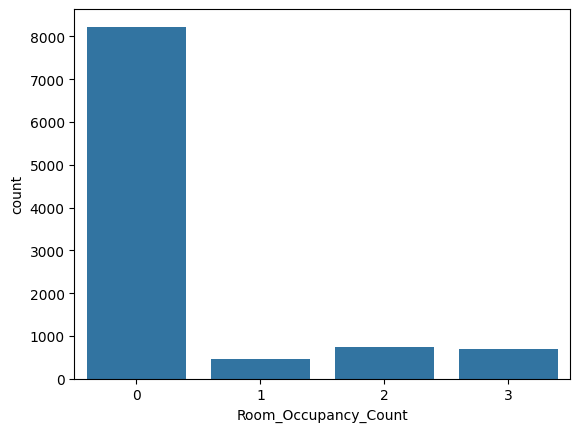

In [17]:
sns.countplot(df, x='Room_Occupancy_Count')
plt.show()

In [6]:
target = df['Room_Occupancy_Count']
target

0        1
1        1
2        1
3        1
4        1
        ..
10124    0
10125    0
10126    0
10127    0
10128    0
Name: Room_Occupancy_Count, Length: 10129, dtype: int64

In [7]:
# Date and Time not so relevant
data = df.drop(columns=['Date','Time','Room_Occupancy_Count'])
data

,S1_Temp,S2_Temp,S3_Temp,S4_Temp,S1_Light,S2_Light,S3_Light,S4_Light,S1_Sound,S2_Sound,S3_Sound,S4_Sound,S5_CO2,S5_CO2_Slope,S6_PIR,S7_PIR
0,24.94,24.75,24.56,25.38,121,34,53,40,0.08,0.19,0.06,0.06,390,0.769231,0,0
1,24.94,24.75,24.56,25.44,121,33,53,40,0.93,0.05,0.06,0.06,390,0.646154,0,0
2,25.00,24.75,24.50,25.44,121,34,53,40,0.43,0.11,0.08,0.06,390,0.519231,0,0
3,25.00,24.75,24.56,25.44,121,34,53,40,0.41,0.10,0.10,0.09,390,0.388462,0,0
4,25.00,24.75,24.56,25.44,121,34,54,40,0.18,0.06,0.06,0.06,390,0.253846,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10124,25.06,25.13,24.69,25.31,6,7,33,22,0.09,0.04,0.06,0.08,345,0.000000,0,0
10125,25.06,25.06,24.69,25.25,6,7,34,22,0.07,0.05,0.05,0.08,345,0.000000,0,0
10126,25.13,25.06,24.69,25.25,6,7,34,22,0.11,0.05,0.06,0.08,345,0.000000,0,0
10127,25.13,25.06,24.69,25.25,6,7,34,22,0.08,0.08,0.10,0.08,345,0.000000,0,0


In [8]:
scaler = StandardScaler()

In [9]:
x_train, x_test, y_train, y_test = train_test_split(data, target, test_size=0.2, random_state=42)

In [10]:
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [11]:
knn = KNeighborsClassifier(n_neighbors=3)

In [12]:
knn.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [13]:
y_pred = knn.predict(x_test)

In [14]:
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.9911154985192497

In [15]:
conf_matrix = confusion_matrix(y_test, y_pred)
conf_matrix

array([[1615,    0,    2,    2],
       [   1,  102,    0,    0],
       [   0,    2,  157,    5],
       [   0,    0,    6,  134]])

In [16]:
class_report = classification_report(y_test, y_pred)
print(class_report)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1619
           1       0.98      0.99      0.99       103
           2       0.95      0.96      0.95       164
           3       0.95      0.96      0.95       140

    accuracy                           0.99      2026
   macro avg       0.97      0.98      0.97      2026
weighted avg       0.99      0.99      0.99      2026

